# <center> SEOUL BIKE SHARING DEMAND PREDICTION </center>

## Data Source

This project utilizes a dataset focused on the demand for bike-sharing in Seoul. The dataset is sourced from the UCI Machine Repository and can be accessed through this link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand.

## Dataset Overview

Bike-sharing systems have become increasingly popular in urban areas as a means of improving mobility and convenience for city dwellers. Ensuring that rental bikes are readily available and easily accessible is critical in reducing wait times and maintaining a consistent supply. As a result, predicting the hourly bike count is an essential task.

The dataset includes 8760 instances, covering weather data (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour, and date information. Each set of 24 instances corresponds to a single day of the year. The primary goal is to predict the number of bicycles rented per hour.

## Features

* Rented Bike Count: The hourly count of rented bikes (dependent variable).
* Date: The date in a year-month-day format.
* Hour: The specific hour within a day.
* Temperature: The temperature in Celsius.
* Humidity: The humidity percentage.
* Windspeed: The wind speed in meters per second (m/s).
* Visibility (10m): The visibility in meters.
* Dew point temperature: The dew point temperature in Celsius.
* Solar radiation: The solar radiation in MJ/m2.
* Rainfall: The amount of rainfall in millimeters (mm).
* Snowfall: The amount of snowfall in centimeters (cm).
* Seasons: Winter, Spring, Summer, or Autumn.
* Holiday: Whether it is a holiday or not.
* Functioning Day: A value of 1 indicates a functioning day (not a weekend or holiday), while a value of 0 indicates otherwise.

## Import Libraries

In [67]:
## import the necessary libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np
from scipy import stats

#For transformation
from sklearn.preprocessing import PowerTransformer

#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Feature_Importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

#residual analysis
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from scipy.stats import shapiro, anderson
from statsmodels.stats.stattools import durbin_watson

#Decision Tree regreesor model
from sklearn.tree import DecisionTreeRegressor

#Random forest regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV




## Load the dataset

In [68]:
# Read the csv file
dataset = pd.read_csv("SeoulBikeData.csv",encoding= 'unicode_escape')

In [69]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [70]:
#view the dataframe
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,12/1/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,12/1/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,12/1/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,12/1/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,12/1/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [71]:
#Check the shape
dataset.shape

(8760, 14)

In [72]:
#columns in the dataset
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Check for duplicates

In [73]:
#dropping the duplicates
dataset.drop_duplicates() 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,12/1/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,12/1/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,12/1/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,12/1/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,12/1/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11/30/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,11/30/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,11/30/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,11/30/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [74]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = dataset[dataset.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant dataset
duplicate

Duplicate Rows :


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


There are no duplicate rows in the datastet.

## Data Quality Report

In [75]:
# Statistical info of the dataset
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The columns in the dataset have appropriate value ranges and don't need much cleaning. However, some columns like "Wind speed," "Dew point temperature (°C)," "Solar Radiation," "Rainfall," and "Snowfall" have significant skewness, which can be observed from their min, median and maximum values.Therefore, transformation methods must be applied to standardize the data.


In [76]:
# list of columns in the dataset
columns = pd.DataFrame(list(dataset.columns.values))


#  data type of each column
data_types = pd.DataFrame(dataset.dtypes,
                          columns=['Data Type'])


# count of missing values in each column
missing_data_counts = pd.DataFrame(dataset.isnull().sum(),
                                   columns=['Missing Values'])


# count of present values in each column
present_data_counts = pd.DataFrame(dataset.count(),
                                   columns=['Present Values'])


# count of unique values in each column
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(dataset.columns.values):
    unique_value_counts.loc[v] = [dataset[v].nunique()]
    
    
    
# minimum value in each column
minimum_values = pd.DataFrame(columns=['Minimum Value'])
for v in list(dataset.columns.values):
    minimum_values.loc[v] = [dataset[v].min()]
    
    
    
# Maximum value in each column    
maximum_values = pd.DataFrame(columns=['Maximum Value'])
for v in list(dataset.columns.values):
    maximum_values.loc[v] = [dataset[v].max()]



# merge all the DataFrames together by the index
data_quality_report = data_types.join(present_data_counts).join(missing_data_counts).join(unique_value_counts).join(minimum_values).join(maximum_values)

# Print the report
print("\nData Quality Report")
print("Total records: {}".format(len(dataset.index)))
data_quality_report



Data Quality Report
Total records: 8760


,Data Type,Present Values,Missing Values,Unique Values,Minimum Value,Maximum Value
Date,object,8760,0,365,1/1/2018,9/9/2018
Rented Bike Count,int64,8760,0,2166,0,3556
Hour,int64,8760,0,24,0,23
Temperature(°C),float64,8760,0,546,-17.8,39.4
Humidity(%),int64,8760,0,90,0,98
Wind speed (m/s),float64,8760,0,65,0.0,7.4
Visibility (10m),int64,8760,0,1789,27,2000
Dew point temperature(°C),float64,8760,0,556,-30.6,27.2
Solar Radiation (MJ/m2),float64,8760,0,345,0.0,3.52
Rainfall(mm),float64,8760,0,61,0.0,35.0


## Data distribution

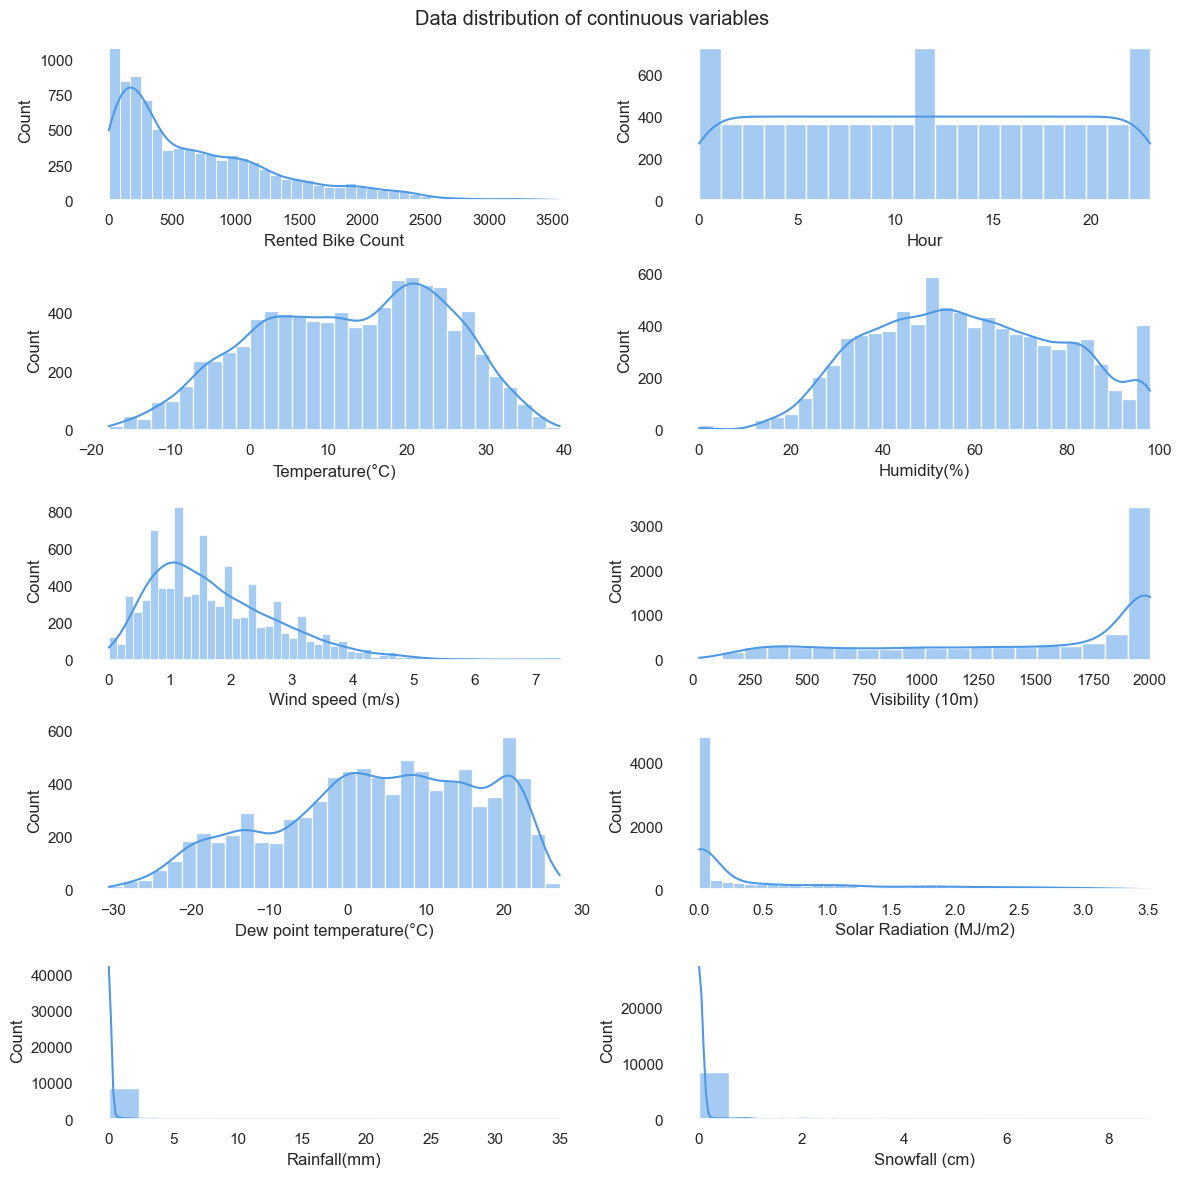

In [77]:

#creating histograms of all continuous variables in the dataset to see the data distribution

plt.figure(figsize=(12, 12))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=dataset, x=col, ax=ax,color=(0.3, 0.6, 0.9),kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Observations:

1) Most of the continuous variables in the dataset are right-skewed. 

2) The "Temperature" variable has a somewhat normal distribution, with a bell-shaped curve in the histogram.

3) The "Dew point temperature" and "Wind speed" variables also have a roughly normal distribution, although they are somewhat skewed.

4) The "Visibility" variable is highly left skewed and "Solar Radiation" is highly Right skewed.


## Feature Engineering

#### Removing Fucntioning day variable

In [78]:
# Group the dataset by 'Functioning Day', calculate the sum of 'Rented Bike Count' for each group, 
# sort the values in descending order, and reset the index


dataset.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


The functioning day is a constant feature because there is a rental bike count only on functioning days and zero on non-functional days. As it is a constant and offers no new information, we can remove it from the data.

In [79]:
# Removing Functioning Day variable from the dataset and creating a new dataframe df1

dataset = dataset.drop(['Functioning Day'], axis = 1)

In [80]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,12/1/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,12/1/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,12/1/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,12/1/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,12/1/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [81]:
#### Seperate Date, Month, Year from Date Column and add Week Day column

# Convert date column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Extract date, month name, and year columns
dataset['Day'] = dataset['Date'].dt.day
dataset['Month'] = dataset['Date'].dt.month_name()
dataset['Year'] = dataset['Date'].dt.year

# Add weekday column
dataset['Weekday'] = dataset['Date'].dt.day_name()

dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday


## Visualizing Outliers using Box Plots

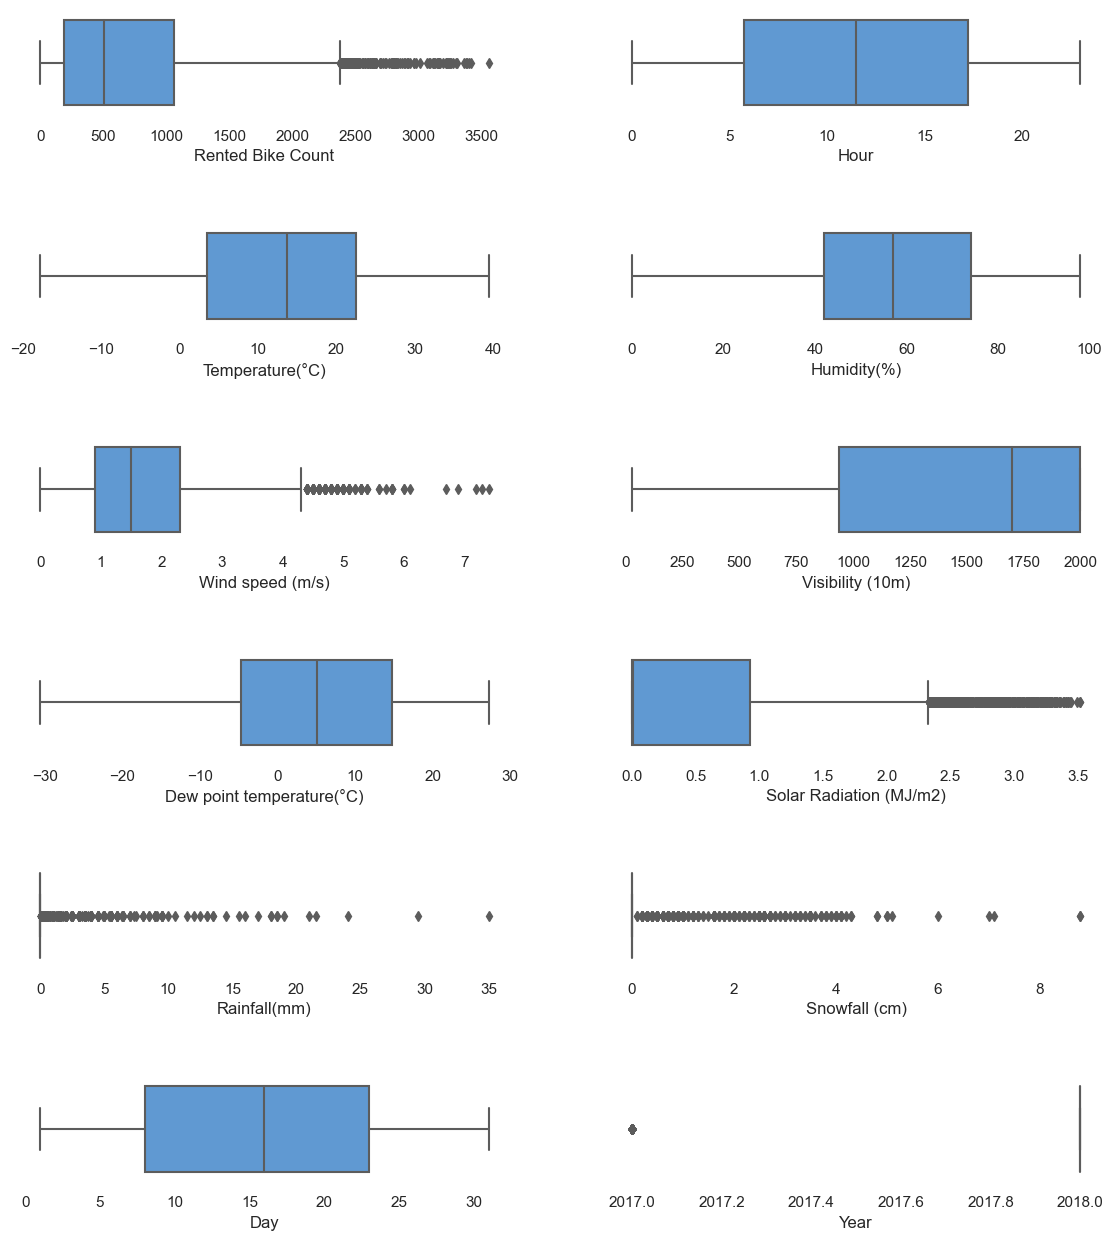

In [82]:

numerical_vars = dataset.select_dtypes(include=['int64', 'float64'])

# Create individual boxplots
fig, axes = plt.subplots(nrows=int(12/2)+1, ncols=2, figsize=(14, 18), 
                         sharex=False, sharey=False, gridspec_kw={'hspace': 1.0})
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=dataset[var], ax=axes[i//2, i%2], color=(0.3, 0.6, 0.9))
    axes[i//2, i%2].set_xlabel(var)

# Remove unused subplots
for i in range(12, len(axes.flat)):
    axes.flat[i].remove()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Observations:

we can observe that there are outliers in Rented Bike Count, Solar Radiation, Wind Speed, Rainfall and Snowfall variables.


## Correlation Matrix 


<AxesSubplot:>

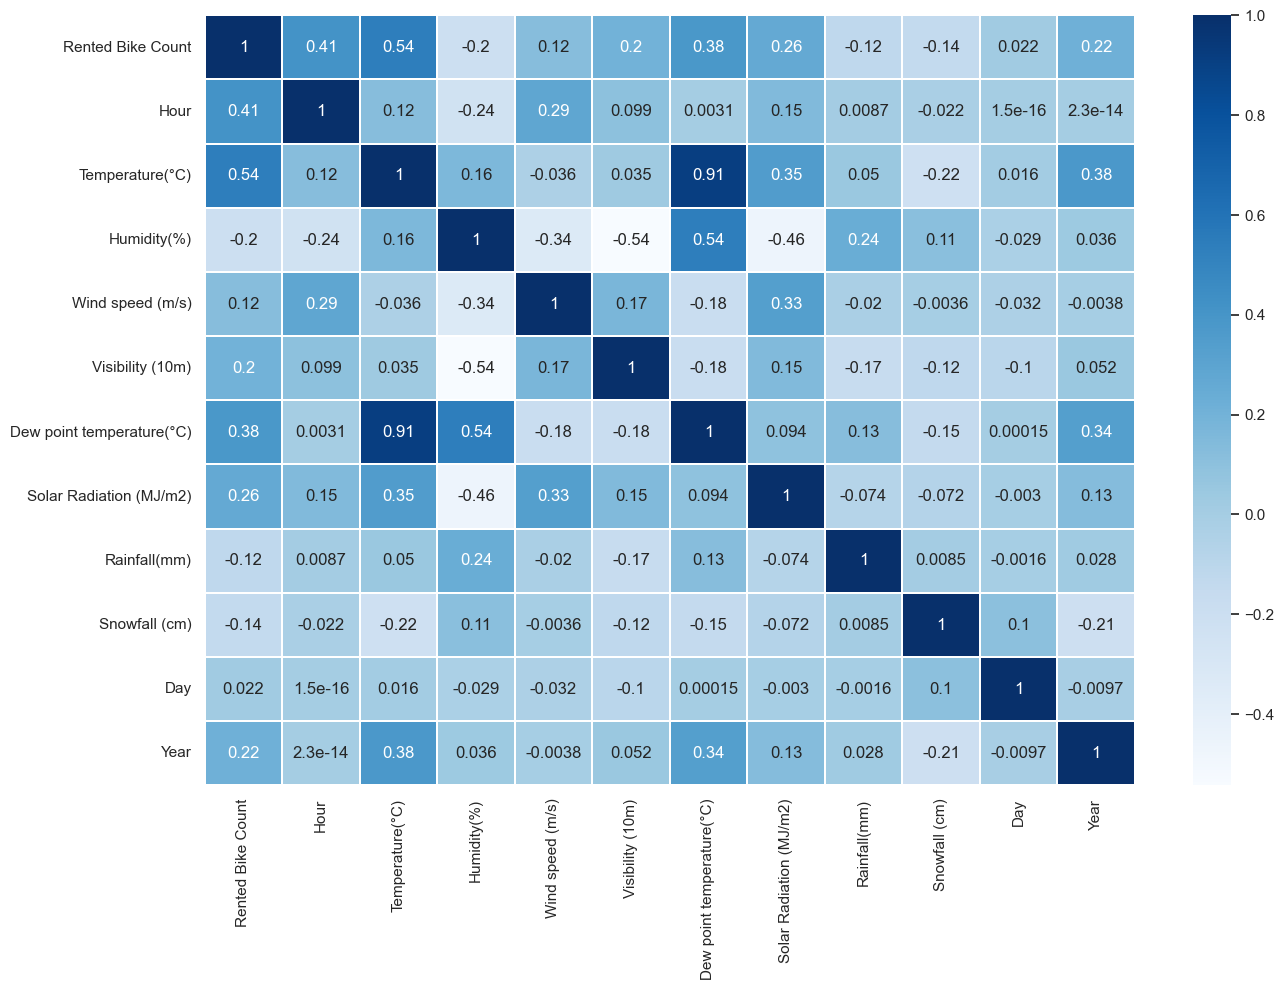

In [83]:
#corr() use to find correlation with data

data_corr= dataset.corr()       
plt.figure(figsize=(15,10))

#create heatmap
sns.heatmap(data_corr, cmap='Blues', linewidths=0.1, annot=True, linecolor='white')

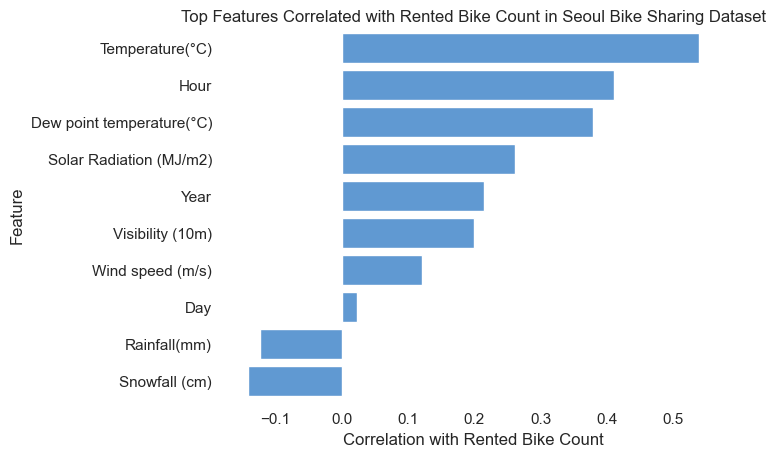

In [84]:
# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Sort the correlation values for the dependent variable in descending order
dep_corr = corr_matrix['Rented Bike Count'].sort_values(ascending=False)

# Remove the dependent variable from the list of features
dep_corr = dep_corr.drop('Rented Bike Count')

# Create a bar plot of the top 10 features correlated with the dependent variable
sns.barplot(x=dep_corr.head(10), y=dep_corr.head(10).index, color=(0.3, 0.6, 0.9))

# Set the x-axis label
plt.xlabel("Correlation with Rented Bike Count")

# Set the y-axis label
plt.ylabel("Feature")

# Set the title of the plot
plt.title("Top Features Correlated with Rented Bike Count in Seoul Bike Sharing Dataset")

# Show the plot
plt.show()

Some key observations from the correlation plot:

* Rented Bike Count has a strong positive correlation with Temperature(°C) (0.538558), which indicates that as the temperature increases, the number of rented bikes also tends to increase. This can be expected, as people are more likely to rent bikes when the weather is warmer.

* Rented Bike Count has a moderate positive correlation with Hour (0.410257) and Solar Radiation (MJ/m2) (0.261837). This suggests that the number of rented bikes increases during specific hours of the day, likely when the sun is out and people are more active.

* Rented Bike Count has a weak negative correlation with Humidity(%) (-0.199780) and Snowfall (cm) (-0.141804), which means that bike rentals tend to decrease when humidity and snowfall are higher.

* Temperature(°C) and Dew point temperature(°C) have a strong positive correlation (0.912798), which is expected as both variables are related to the weather conditions.

* Humidity(%) has a strong negative correlation with Visibility (10m) (-0.543090), which indicates that as humidity increases, visibility tends to decrease.

* Wind speed (m/s) has a moderate positive correlation with Hour (0.285197) and Solar Radiation (MJ/m2) (0.332274). This suggests that wind speed is generally higher during certain hours of the day, possibly when solar radiation is higher.

## Visualizations

###  Bar chart showing the count of rentals by Day of Week:


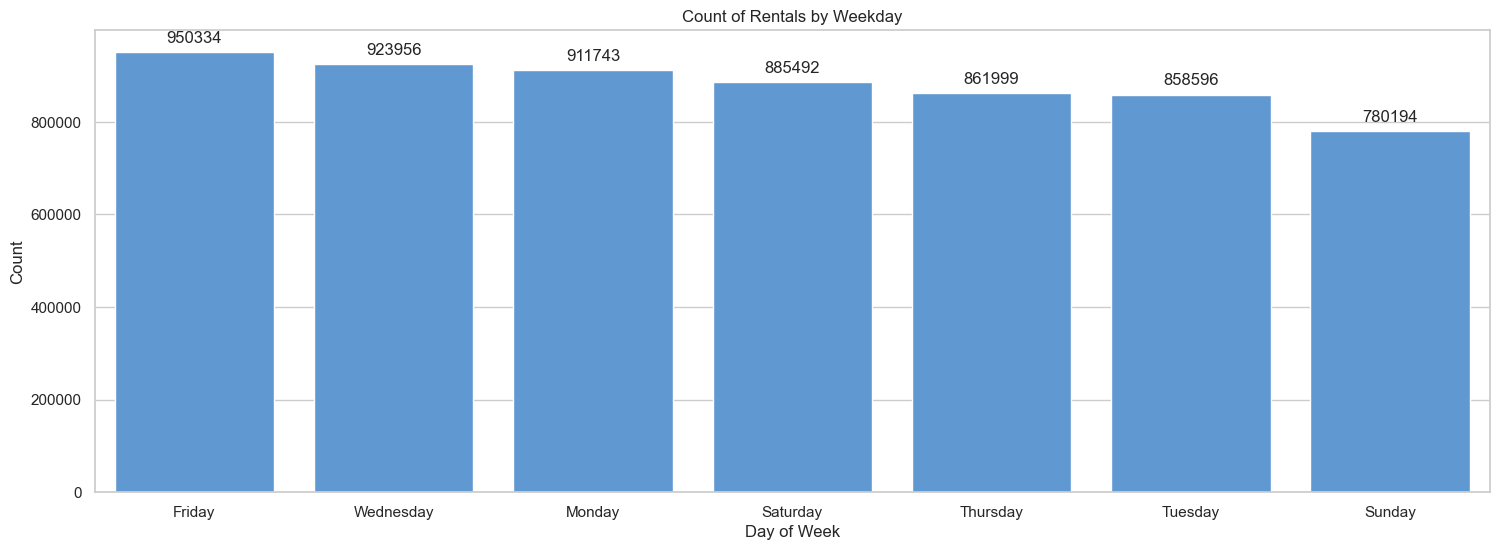

In [85]:
sns.set_style('whitegrid')

# Group the data by month and calculate the count of rentals per month
rentals_by_Weekday = dataset.groupby('Weekday')['Rented Bike Count'].sum().reset_index()


# Sort the data in descending order by count of rentals per month
rentals_by_Weekday = rentals_by_Weekday.sort_values('Rented Bike Count', ascending=False)

plt.figure(figsize=(18, 6))
ax = sns.barplot(x='Weekday', y='Rented Bike Count', data=rentals_by_Weekday, color=(0.3, 0.6, 0.9))
plt.title('Count of Rentals by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Count')

# Add count labels to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points', fontsize=12)

plt.show()

In [86]:
rentals_by_Weekday

,Weekday,Rented Bike Count
0,Friday,950334
6,Wednesday,923956
1,Monday,911743
2,Saturday,885492
4,Thursday,861999
5,Tuesday,858596
3,Sunday,780194


Key observations:

* Friday has the highest number of rented bikes (950,334), suggesting that people tend to rent bikes more often on Fridays. This could be due to several reasons, such as individuals commuting to work or social events, or preparing for weekend activities.

* Sunday has the lowest number of rented bikes (780,194). This indicates that bike rentals are less popular on Sundays, possibly because people are more likely to stay at home, rest, or engage in other leisure activities that don't involve biking.

* The weekdays, excluding Friday, have relatively similar numbers of rented bikes (ranging from 858,596 to 923,956). This suggests that bike rentals are generally consistent across Monday through Thursday, with Wednesday having the second-highest number of rentals.

* There is a noticeable drop in rented bikes between weekdays and weekends, with Saturday having 885,492 rentals and Sunday having the lowest number. This may be due to differences in commuting patterns, as people may be more likely to use bikes for transportation on weekdays than on weekends.

###  Bar chart showing the count of rentals by Month:


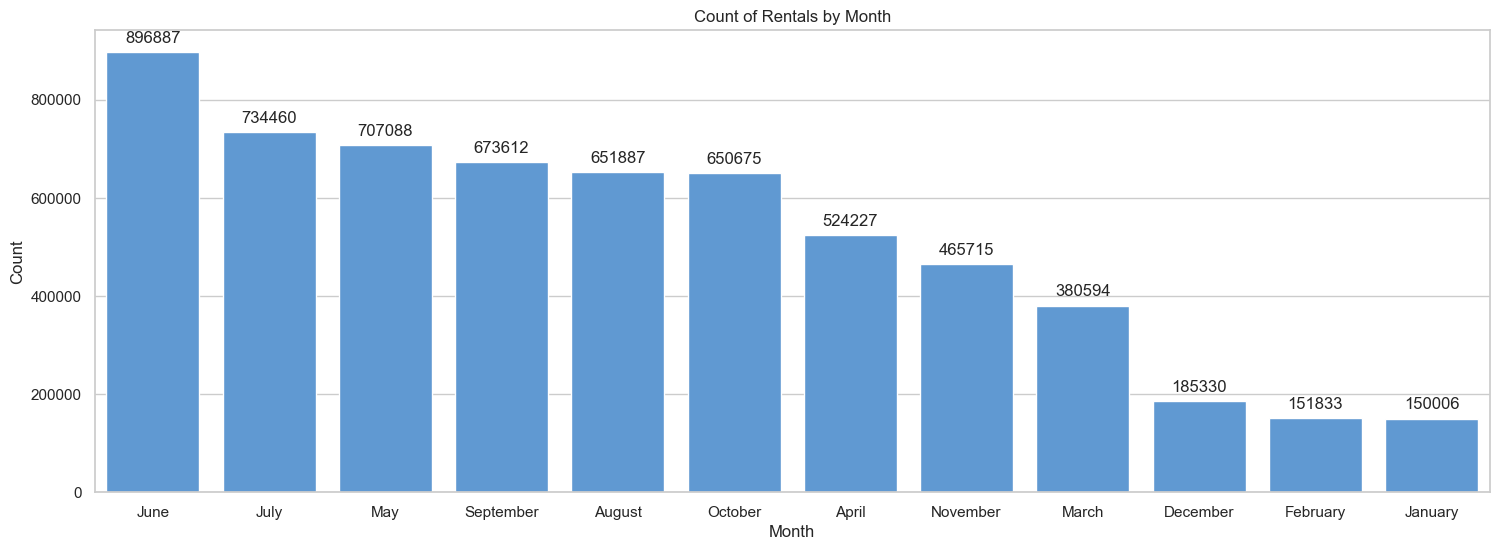

In [87]:
sns.set_style('whitegrid')

# Group the data by month and calculate the count of rentals per month
rentals_by_month = dataset.groupby('Month')['Rented Bike Count'].sum().reset_index()


# Sort the data in descending order by count of rentals per month
rentals_by_month = rentals_by_month.sort_values('Rented Bike Count', ascending=False)

plt.figure(figsize=(18, 6))
ax = sns.barplot(x='Month', y='Rented Bike Count', data=rentals_by_month, color=(0.3, 0.6, 0.9))
plt.title('Count of Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Add count labels to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points', fontsize=12)

plt.show()


In [88]:
rentals_by_month

,Month,Rented Bike Count
6,June,896887
5,July,734460
8,May,707088
11,September,673612
1,August,651887
10,October,650675
0,April,524227
9,November,465715
7,March,380594
2,December,185330


Some key observations:

* June has the highest number of rented bikes (896,887), indicating that bike rentals are most popular during this month. This is likely due to favorable weather conditions for outdoor activities, as June typically has warmer temperatures and longer daylight hours.

* January and February have the lowest number of rented bikes (150,006 and 151,833, respectively). This suggests that bike rentals are least popular during these winter months, possibly due to colder temperatures, shorter daylight hours, and inclement weather conditions like snow or rain.

* Bike rentals seem to follow a seasonal pattern, with higher numbers during the warmer months (May to October) and lower numbers during the colder months (November to April). This trend supports the idea that weather conditions play a significant role in influencing people's decisions to rent bikes.

* There is a noticeable drop in rented bikes between October (650,675) and November (465,715), indicating a sharp decrease in bike rentals as the weather transitions from fall to winter.

### Box plot showing the distribution of rental counts by season

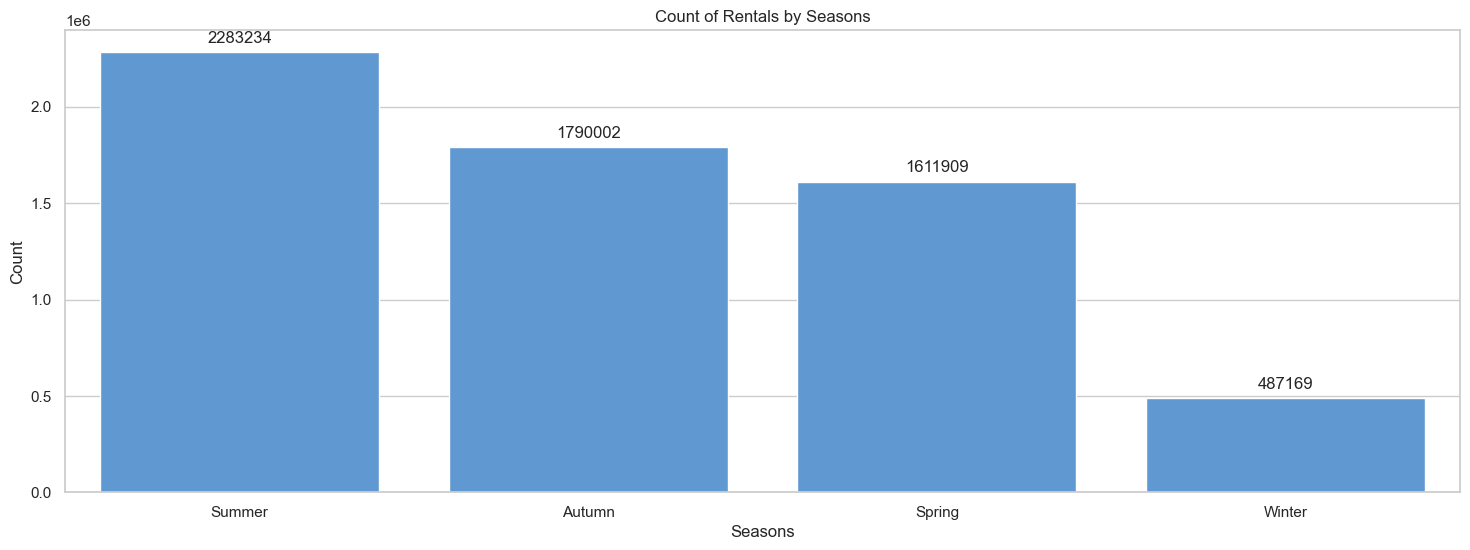

In [89]:
sns.set_style('whitegrid')

# Group the data by month and calculate the count of rentals per month
rentals_by_season = dataset.groupby('Seasons')['Rented Bike Count'].sum().reset_index()

# Sort the data in descending order by count of rentals per month
rentals_by_season = rentals_by_season.sort_values('Rented Bike Count', ascending=False)

plt.figure(figsize=(18, 6))
ax = sns.barplot(x='Seasons', y='Rented Bike Count', data=rentals_by_season, color=(0.3, 0.6, 0.9))
plt.title('Count of Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Count')

# Add count labels to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points', fontsize=12)

plt.show()


In [90]:
rentals_by_season

,Seasons,Rented Bike Count
2,Summer,2283234
0,Autumn,1790002
1,Spring,1611909
3,Winter,487169


some key observations:

* Summer has the highest number of rented bikes (2,283,234), indicating that bike rentals are most popular during this season. This can be attributed to the warmer temperatures, longer daylight hours, and generally more pleasant weather conditions, which make outdoor activities, like biking, more enjoyable.

* Winter has the lowest number of rented bikes (487,169), suggesting that bike rentals are least popular during this season. This is likely due to the colder temperatures, shorter daylight hours, and potentially harsh weather conditions, such as snow, ice, or rain, which make biking less appealing or even dangerous.

* Bike rentals show a clear seasonal pattern, with a significant increase in the number of rentals from Winter to Spring (1,611,909) and from Spring to Summer (2,283,234). This trend highlights the strong influence of weather conditions on people's decisions to rent bikes.

* The difference in bike rentals between Autumn (1,790,002) and Spring (1,611,909) is not as pronounced as the difference between Summer and Winter. This suggests that although weather conditions still play a role in bike rentals during these seasons, other factors, such as local events or personal preferences, may also have an impact.

### Line graph showing the trend of hourly rentals over a day

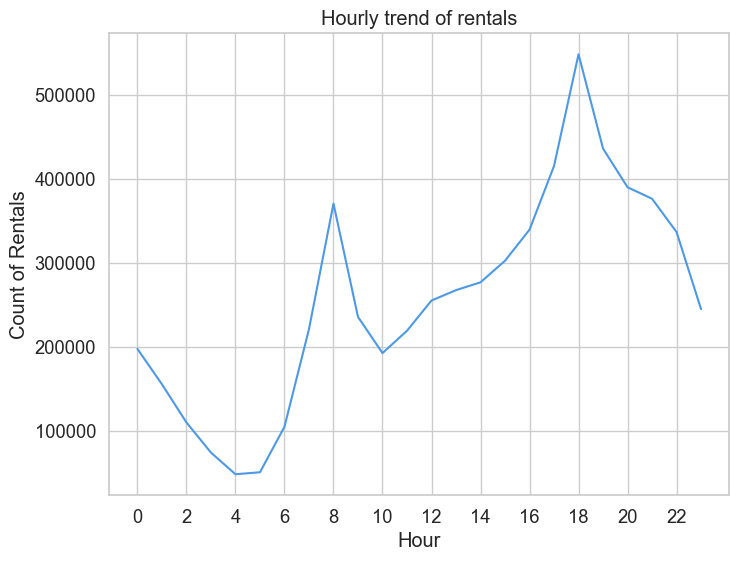

In [91]:
# Group the data by hour and calculate the count of rentals per hour
rentals_by_hour = dataset.groupby('Hour')['Rented Bike Count'].sum().reset_index()

# Create a line plot of the count of rentals by hour
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Hour', y='Rented Bike Count', data=rentals_by_hour, color=(0.3, 0.6, 0.9))
plt.title('Hourly trend of rentals')
plt.xlabel('Hour')
plt.ylabel('Count of Rentals')
plt.xticks(range(0, 24, 2))
plt.show()

In [92]:
rentals_by_hour

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


Some key observations:

* The highest number of rented bikes occurs during the evening rush hour, specifically at 6 PM (548,568) and 5 PM (415,556). This suggests that many people use bike rentals for commuting home from work or school.

* The morning rush hour, particularly at 8 AM (370,731) and 7 AM (221,192), also sees a significant number of bike rentals. This indicates that bike rentals are popular for commuting to work or school in the morning as well.

* Bike rentals drop significantly during the early morning hours, reaching the lowest point at 4 AM (48,396). This can be attributed to fewer people being active during these hours and the limited daylight, which may make biking less appealing or safe.

* There is a steady increase in bike rentals from the early morning to the afternoon, peaking at 2 PM (276,971) and 3 PM (302,653). This trend suggests that bike rentals are also popular for leisure activities, running errands, or attending appointments during the day.

### Scatter plot showing the relationship between temperature and rental count

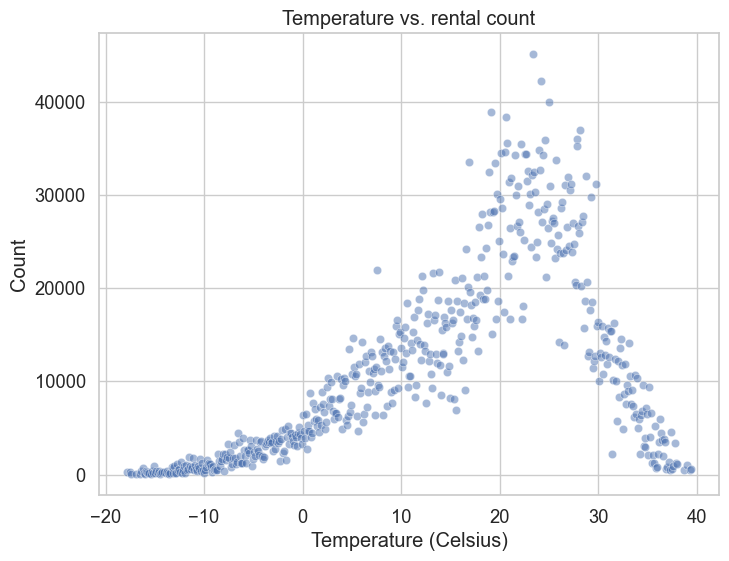

In [93]:
# Group the data by hour and calculate the count of rentals per hour
rentals_by_temperature = dataset.groupby('Temperature(°C)')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=rentals_by_temperature, alpha=0.5)
plt.title('Temperature vs. rental count')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Count')
plt.show()


Observations: 

* The scatter plot shows a general upward trend, indicating that warmer temperatures lead to more bike rentals.

* 20-30 degree celsius is the optimal temperature range in which bike rentals are the most popular.

### Box plot showing the distribution of rental counts by day

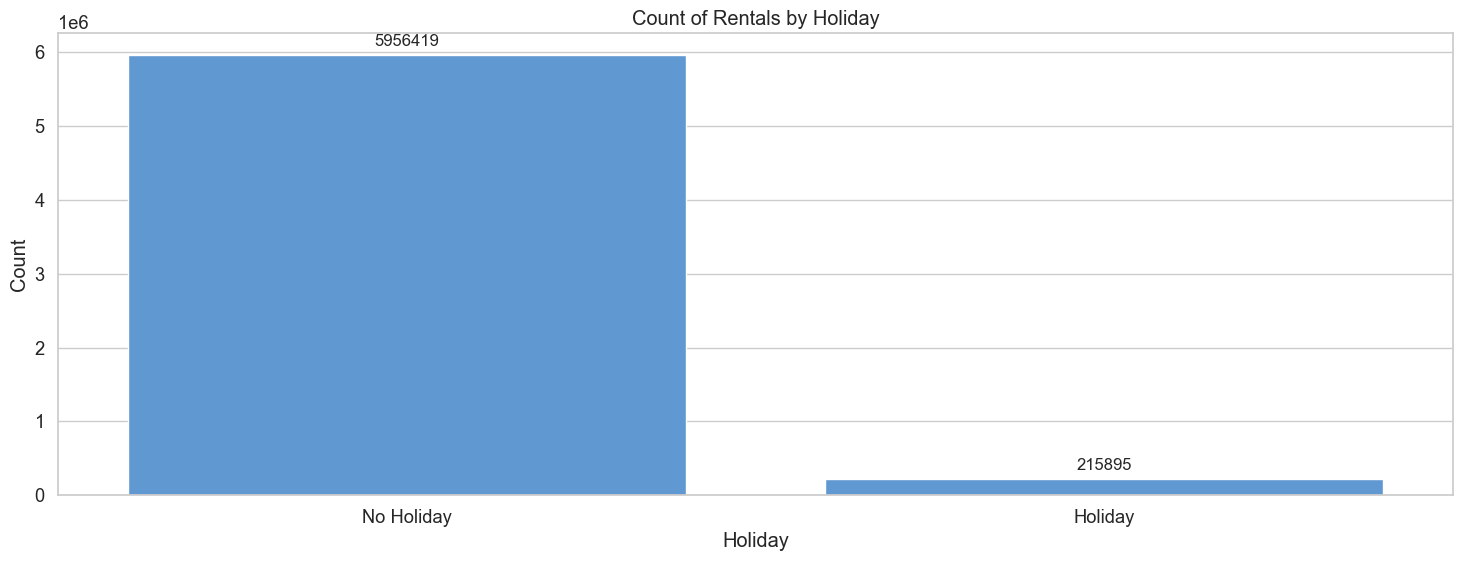

In [94]:
# Group the data by hour and calculate the count of rentals by holiday day or not

rentals_by_day= dataset.groupby('Holiday')['Rented Bike Count'].sum().reset_index()

# Sort the data in descending order by count of rentals per month
rentals_by_day = rentals_by_day.sort_values('Rented Bike Count', ascending=False)

plt.figure(figsize=(18, 6))
ax = sns.barplot(x='Holiday', y='Rented Bike Count', data=rentals_by_day, color=(0.3, 0.6, 0.9))
plt.title('Count of Rentals by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')

# Add count labels to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points', fontsize=12)

plt.show()

In [95]:
rentals_by_day

,Holiday,Rented Bike Count
1,No Holiday,5956419
0,Holiday,215895


some key observations:

* Significantly higher bike rentals on non-holidays: The number of rented bikes on non-holidays (5,956,419) is substantially higher than on holidays (215,895). This suggests that bike rentals are more popular during regular days, which may be due to people using bikes for commuting to work, school, or other daily activities.

* Lower bike rentals on holidays: The lower number of rented bikes on holidays could be because people might have different travel patterns, engage in different leisure activities, or spend more time at home during holidays. This could result in less demand for bike rentals compared to non-holidays.

# Transformation

In [96]:
df = dataset

In [97]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,December,2017,Friday


In [98]:
#Drop

df.drop(columns=['Day', 'Year'],inplace=True)  

In [99]:
#selecting variables that have data types float and int.
var = list(df.select_dtypes(include=['float64','int64']).columns)

In [100]:

sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

### Data distribution after trasformation


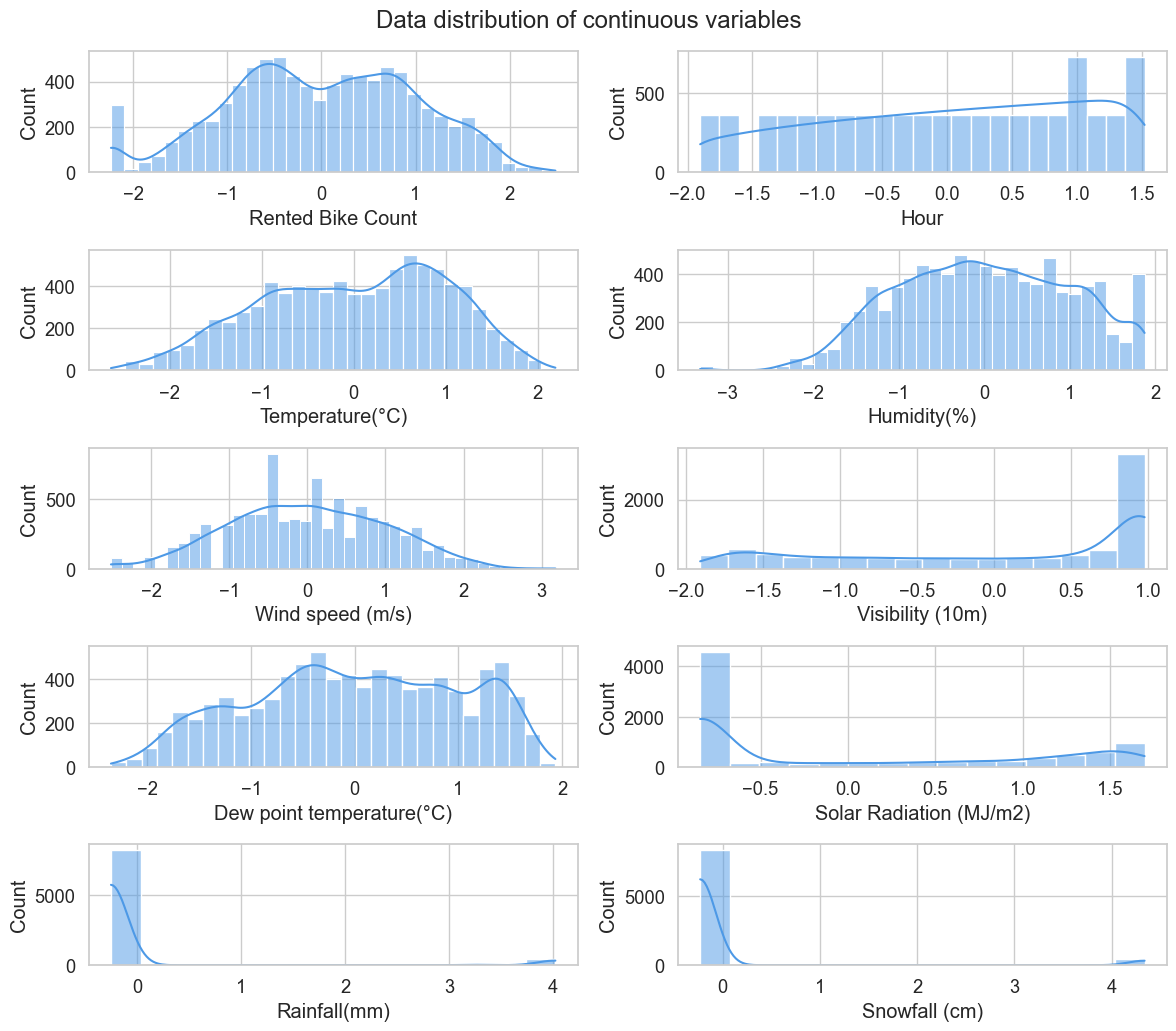

In [101]:
# data distribution after trasformation

plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(6,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color=(0.3, 0.6, 0.9),kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Observations:

After applying transformation the data seems to be normally distributed for most of the continuous variables.

## Visualizing Outliers using Box Plots after transformation

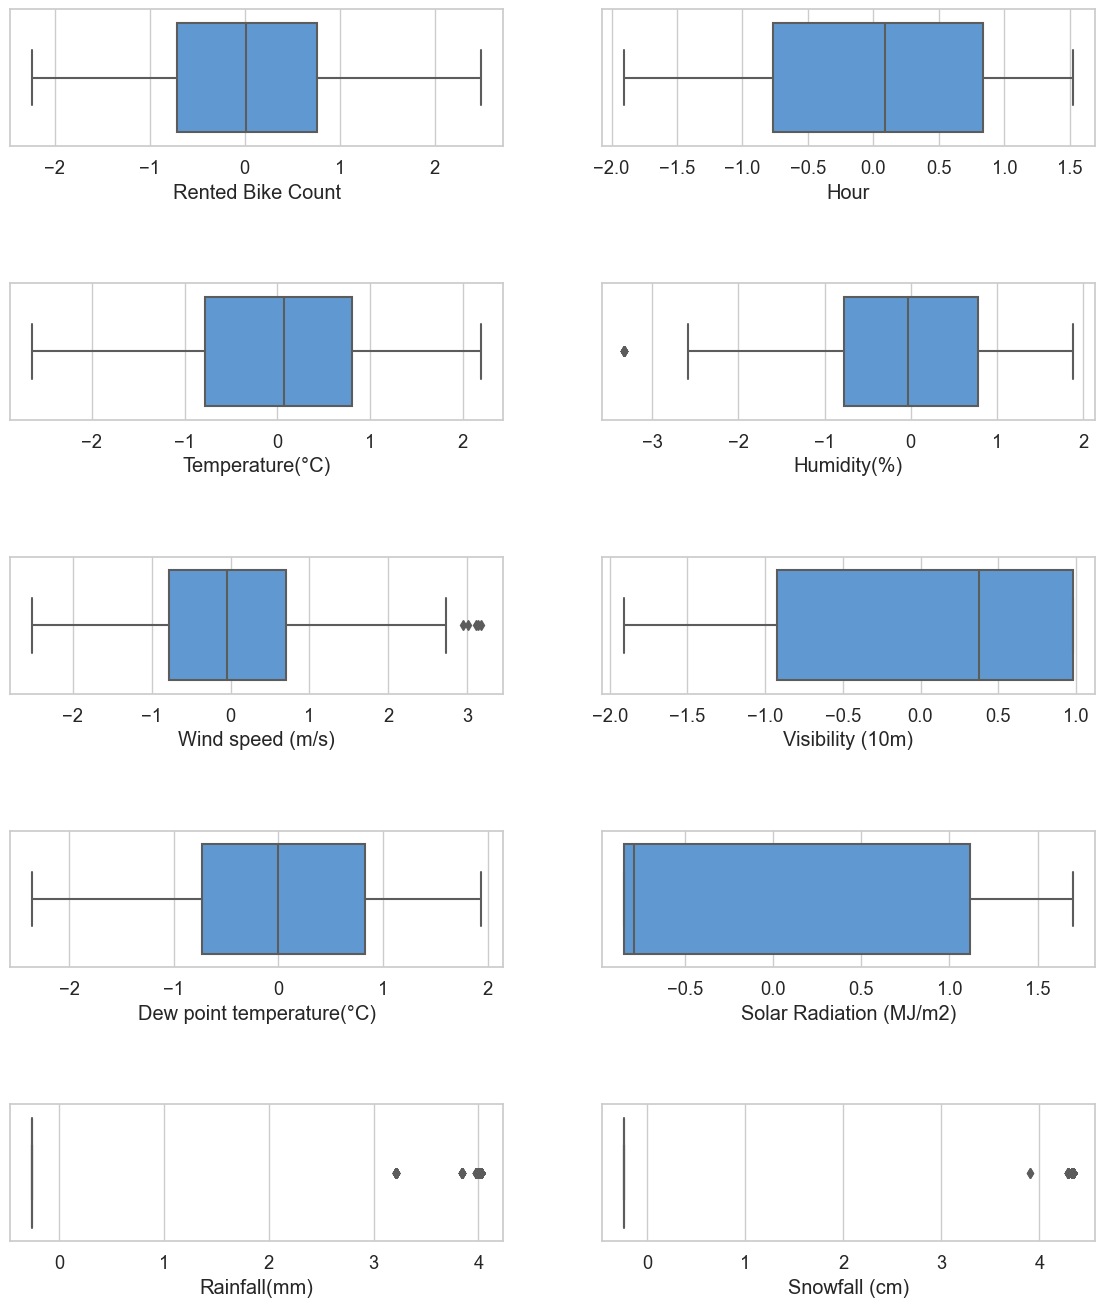

In [102]:
numerical_vars = list(df.select_dtypes(include=['int64', 'float64']))

# Create individual boxplots
fig, axes = plt.subplots(nrows=int(10/2), ncols=2, figsize=(14, 16), 
                         sharex=False, sharey=False, gridspec_kw={'hspace': 1.0})
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=df[var], ax=axes[i//2, i%2], color=(0.3, 0.6, 0.9))
    axes[i//2, i%2].set_xlabel(var)

# Remove unused subplots
for i in range(12, len(axes.flat)):
    axes.flat[i].remove()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Observations:

After applying the transformation, the outliers has decreased significantly which can be seen from the above box plots.

# Modeling

In [103]:
#Dropping irrelevant columns
df_final = df.drop(["Dew point temperature(°C)", "Date"], axis=1) 

# Creating dummy variables 
df_final = pd.get_dummies(df_final,drop_first=True)




Since Dew point temperature(°C) and Temperature(°C)	are highly correlated and alos there is no use of Date variable, we removed both Dew point Temperature and Date variables and created dummy variables for the categorical variables to build models.

In [104]:
df_final.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,...,Month_May,Month_November,Month_October,Month_September,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,-0.530004,-1.902967,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.676497,-1.654871,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.779424,-1.440263,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.047379,-1.244866,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.200315,-1.062616,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_final.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

## Multiple Linear Regression Model

In [106]:

# Select the input features and target variable
X = df_final.drop('Rented Bike Count', axis=1)
y = df_final['Rented Bike Count']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

### OLS

In [107]:
# Creating a model with all the variables

X_train_xm = sm.add_constant(X_train)

model1 = sm.OLS(y_train.astype(float), X_train_xm.astype(float)).fit()



model1.params
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     298.4
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:23:59   Log-Likelihood:                -7306.3
No. Observations:                7008   AIC:                         1.467e+04
Df Residuals:                    6981   BIC:                         1.485e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1344      0.037     -3.619      0.000      -0.207      -0.062
Hour                        0.2704      0.009     29.486      0.000       0.252       0.288
Temperature(°C)             0.3647      0.026     14.111      0.000       0.314       0.415
Humidity(%)                -0.1279      0.014     -9.012      0.000      -0.156      -0.100
Wind speed (m/s)            0.0070      0.010      0.732      0.464      -0.012       0.026
Visibility (10m)            0.0459      0.012      3.710      0.000       0.022       0.070
Solar Radiation (MJ/m2)     0.0342      0.011      3.037      0.002       0.012       0.056
Rainfall(mm)               -0.2605      0.009    -28.908      0.000      -0.278      -0.243
Snowfall (cm)               0.0079      0.009      0.842      0.400      -0.010       0.026
Seasons_Spring           5.564e-06      0.028      0.000      1.000      -0.055       0.055
Seasons_Summer              0.0982      0.026      3.800      0.000       0.048       0.149
Seasons_Winter             -0.2821      0.030     -9.487      0.000      -0.340      -0.224
Holiday_No Holiday          0.2820      0.039      7.307      0.000       0.206       0.358
Month_August               -0.1790      0.027     -6.533      0.000      -0.233      -0.125
Month_December              0.0312      0.025      1.256      0.209      -0.017       0.080
Month_February             -0.1716      0.026     -6.545      0.000      -0.223      -0.120
Month_January              -0.1417      0.027     -5.226      0.000      -0.195      -0.089
Month_July                 -0.0465      0.026     -1.805      0.071      -0.097       0.004
Month_June                  0.3237      0.024     13.337      0.000       0.276       0.371
Month_March                -0.0863      0.042     -2.040      0.041      -0.169      -0.003
Month_May                   0.1964      0.042      4.668      0.000       0.114       0.279
Month_November              0.0478      0.031      1.544      0.123      -0.013       0.109
Month_October               0.1198      0.026      4.578      0.000       0.068       0.171
Month_September            -0.1181      0.034     -3.493      0.000      -0.184      -0.052
Weekday_Monday             -0.0179      0.031     -0.586      0.558      -0.078       0.042
Weekday_Saturday           -0.0941      0.031     -3.072      0.002      -0.154      -0.034
Weekday_Sunday             -0.2072      0.031     -6.773      0.000      -0.267      -0.147
Weekday_Thursday           -0.1093      0.031     -3.543      0.000      -0.170      -0.049
Weekday_Tuesday            -0.1833      0.031     -5.943      0.000      -0.244      -0.123
Weekday_Wednesday          -0.0383      0.031     -1.243      0.214      -0.099       0.022
===============================================

In [108]:

# check it's ViF
vif = pd.DataFrame()
data = X
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Month_February,inf
10,Seasons_Winter,inf
16,Month_July,inf
15,Month_January,inf
13,Month_December,inf
12,Month_August,inf
9,Seasons_Summer,inf
17,Month_June,inf
8,Seasons_Spring,10.59
1,Temperature(°C),9.77


## Model 2

### Removing variables with  VIF values and high p-value i.e., >0.05 and building a new model

In [109]:
# Select the input features and target variable
X = df_final[['Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)','Rainfall(mm)', 'Visibility (10m)','Hour', 'Holiday_No Holiday',  'Month_March', 'Month_May', 'Month_October', 'Month_September', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday']]
y = df_final['Rented Bike Count']

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [111]:
# Creating a model with all the variables
import statsmodels.api as sm
X_train_xm = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train_xm).fit()

model2.params
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     456.7
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:24:01   Log-Likelihood:                -7595.9
No. Observations:                7008   AIC:                         1.522e+04
Df Residuals:                    6992   BIC:                         1.533e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2685      0.041     -6.526      0.000      -0.349      -0.188
Temperature(°C)             0.5220      0.010     50.214      0.000       0.502       0.542
Humidity(%)                -0.1289      0.014     -9.459      0.000      -0.156      -0.102
Solar Radiation (MJ/m2)     0.0111      0.011      0.992      0.321      -0.011       0.033
Rainfall(mm)               -0.2589      0.009    -27.958      0.000      -0.277      -0.241
Visibility (10m)            0.0349      0.011      3.153      0.002       0.013       0.057
Hour                        0.2643      0.009     29.179      0.000       0.247       0.282
Holiday_No Holiday          0.3131      0.040      7.813      0.000       0.235       0.392
Month_March                 0.0464      0.032      1.469      0.142      -0.015       0.108
Month_May                   0.2190      0.031      6.977      0.000       0.157       0.281
Month_October               0.2122      0.032      6.698      0.000       0.150       0.274
Month_September            -0.1434      0.033     -4.302      0.000      -0.209      -0.078
Weekday_Saturday           -0.0474      0.026     -1.811      0.070      -0.099       0.004
Weekday_Sunday             -0.1594      0.026     -6.055      0.000      -0.211      -0.108
Weekday_Thursday           -0.0502      0.026     -1.923      0.054      -0.101       0.001
Weekday_Tuesday            -0.1517      0.026     -5.786      0.000      -0.203      -0.100
==============================================================================
Omnibus:                     1572.836   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5077.068
Skew:                          -1.132   Prob(JB):                         0.00
Kurtosis:                       6.502   Cond. No.                         9.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3

### Removing variables with high p-value i.e., >0.05 and building a new model

In [112]:
# Select the input features and target variable
X = df_final[['Temperature(°C)', 'Humidity(%)','Rainfall(mm)', 'Visibility (10m)','Hour', 'Holiday_No Holiday', 'Month_May', 'Month_October', 'Month_September', 'Weekday_Sunday', 'Weekday_Tuesday']]
y = df_final['Rented Bike Count']

In [113]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [114]:
# Creating a model with all the variables

X_train_xm = sm.add_constant(X_train)

model3 = sm.OLS(y_train, X_train_xm).fit()

model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     621.6
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:24:01   Log-Likelihood:                -7600.3
No. Observations:                7008   AIC:                         1.522e+04
Df Residuals:                    6996   BIC:                         1.531e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2804      0.040     -6.927      0.000      -0.360      -0.201
Temperature(°C)        0.5257      0.009     56.987      0.000       0.508       0.544
Humidity(%)           -0.1368      0.011    -11.930      0.000      -0.159      -0.114
Rainfall(mm)          -0.2586      0.009    -28.000      0.000      -0.277      -0.240
Visibility (10m)       0.0307      0.011      2.868      0.004       0.010       0.052
Hour                   0.2649      0.009     29.284      0.000       0.247       0.283
Holiday_No Holiday     0.3104      0.040      7.755      0.000       0.232       0.389
Month_May              0.2142      0.031      6.861      0.000       0.153       0.275
Month_October          0.2109      0.032      6.688      0.000       0.149       0.273
Month_September       -0.1473      0.033     -4.426      0.000      -0.213      -0.082
Weekday_Sunday        -0.1414      0.025     -5.656      0.000      -0.190      -0.092
Weekday_Tuesday       -0.1324      0.025     -5.312      0.000      -0.181      -0.084
==============================================================================
Omnibus:                     1578.142   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5116.418
Skew:                          -1.134   Prob(JB):                         0.00
Kurtosis:                       6.518   Cond. No.                         9.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Calculate R2, MSE, RMSE

In [115]:
# Create an instance of the LinearRegression model
model4 = LinearRegression()

# Fit the model to the training data
model4.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model4.predict(X_test)

# Calculate the R2 score, RMSE, and MSE of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the R2 score, RMSE, and MSE
print("R2 Score: {:.2f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("MSE: {:.2f}".format(mse))


R2 Score: 0.49
RMSE: 0.69
MSE: 0.48


### Observations:

Based on the OLS regression results, the model seems to be reasonably good but not perfect.

* R-squared and Adjusted R-squared: Both values are around 0.49, indicating that the model explains about 49% of the variance in the 'Rented Bike Count'. This value could be improved, but it's not too low either.

* F-statistic and its p-value: The F-statistic is 621.6, and the associated p-value is extremely small (almost 0.00). This indicates that the model is statistically significant, and there is a relationship between the features and the target variable.

* Individual feature coefficients (coef) and their p-values (P>|t|): Most of the coefficients have p-values smaller than 0.05, indicating that they are statistically significant. Some of the important features include 'Temperature(°C)', 'Humidity(%)', 'Rainfall(mm)', 'Hour', 'Holiday_No Holiday', and several months and weekdays.

* Omnibus, Skew, and Kurtosis: The Omnibus test has a very low p-value, indicating that the residuals are not normally distributed. The Skew and Kurtosis values also suggest that the distribution of the residuals is not ideal.

Overall, the model seems to be reasonably good, but there is room for improvement. You may try other algorithms like Random Forest or Gradient Boosting to see if they can provide better results. Additionally, feature engineering or feature selection methods might help improve the model's performance.

### Interpretation of coefficients

Based on the provided OLS regression results, we can interpret the coefficients as follows:

Temperature(°C): A positive coefficient (0.5257) indicates that as the temperature increases by 1°C, the number of rented bikes increases by approximately 0.53 units, holding all other factors constant. This suggests a positive relationship between temperature and bike demand.

Humidity(%): A negative coefficient (-0.1368) implies that as the humidity increases by 1%, the number of rented bikes decreases by about 0.14 units, all else being equal. This indicates a negative relationship between humidity and bike demand.

Rainfall(mm): A negative coefficient (-0.2586) shows that as rainfall increases by 1mm, the number of rented bikes decreases by roughly 0.26 units, holding all other factors constant. This suggests a negative relationship between rainfall and bike demand.

Visibility (10m): A positive coefficient (0.0307) means that as visibility increases by 10 meters, the number of rented bikes increases by approximately 0.03 units, all else being equal. This indicates a positive relationship between visibility and bike demand.

Hour: A positive coefficient (0.2649) implies that with every additional hour, the number of rented bikes increases by about 0.26 units, holding all other factors constant. This suggests a positive relationship between the time of day and bike demand.

Holiday_No Holiday: A positive coefficient (0.3104) indicates that on non-holiday days, the number of rented bikes increases by approximately 0.31 units compared to holidays, all else being equal. This suggests a higher bike demand on non-holiday days.

Month_May: A positive coefficient (0.2142) implies that bike demand in May is higher by about 0.21 units compared to the reference month (not mentioned), holding all other factors constant.

Month_October: A positive coefficient (0.2109) shows that bike demand in October is higher by roughly 0.21 units compared to the reference month, all else being equal.

Month_September: A negative coefficient (-0.1473) suggests that bike demand in September is lower by about 0.15 units compared to the reference month, holding all other factors constant.

Weekday_Sunday: A negative coefficient (-0.1414) indicates that bike demand on Sundays is lower by approximately 0.14 units compared to the reference weekday (not mentioned), all else being equal.

Weekday_Tuesday: A negative coefficient (-0.1324) implies that bike demand on Tuesdays is lower by about 0.13 units compared to the reference weekday, holding all other factors constant.


## Calculate VIF Values

In [116]:
# check it's ViF
vif = pd.DataFrame()
data = X
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity(%),1.78
5,Holiday_No Holiday,1.64
3,Visibility (10m),1.55
8,Month_September,1.22
2,Rainfall(mm),1.19
9,Weekday_Sunday,1.18
10,Weekday_Tuesday,1.18
0,Temperature(°C),1.15
6,Month_May,1.14
7,Month_October,1.14


VIF values indicates that there is no multi collinearity issue.

# Feature Importance

In [117]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x000002D792109280>)

In [118]:
feature_contribution = (fs.scores_ / sum(fs.scores_)) * 100

# create a dictionary with feature names and their scores
feature_dict = {X.columns[i]: feature_contribution[i] for i in range(len(X.columns))}

# sort the dictionary in descending order based on the scores
sorted_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)

# print the features in descending order of their importance
for feature in sorted_features:
    print(f'{feature[0]} : {feature[1]:.2f}%')


Temperature(°C) : 50.46%
Hour : 21.73%
Rainfall(mm) : 11.78%
Humidity(%) : 7.35%
Visibility (10m) : 5.06%
Month_May : 1.15%
Holiday_No Holiday : 1.10%
Month_September : 0.53%
Month_October : 0.42%
Weekday_Sunday : 0.33%
Weekday_Tuesday : 0.10%


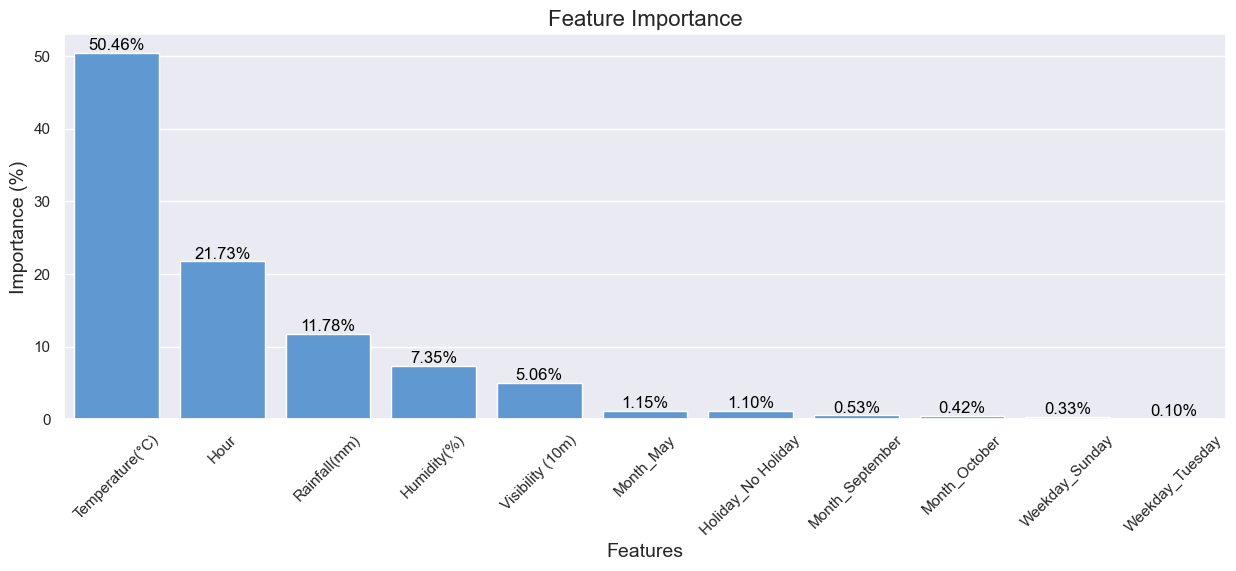

In [119]:
# Set the Seaborn style and aesthetics
sns.set_theme(style="white")
sns.set(font_scale=1.0)

# Extract feature names and scores from the sorted_features list
feature_names = [feature[0] for feature in sorted_features]
feature_scores = [feature[1] for feature in sorted_features]

# Create a beautiful bar plot in light blue
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=feature_names, y=feature_scores, color=(0.3, 0.6, 0.9))
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance (%)', fontsize=14)
plt.title('Feature Importance', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add the actual values on top of the bars
for index, value in enumerate(feature_scores):
    ax.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

plt.show()



### Observations:

Weather factors:

Temperature(°C): Temperature has the highest feature importance (50.46%). This indicates that it plays a crucial role in determining bike usage patterns. As the temperature increases, people are more likely to rent bikes, suggesting a positive relationship between temperature and bike usage.
Rainfall(mm): Rainfall has the third-highest feature importance (11.78%). Increased rainfall is likely to discourage people from renting bikes, resulting in a negative relationship between rainfall and bike usage.
Humidity(%): Humidity has a relatively lower feature importance (7.35%), but it still affects bike usage patterns. High humidity levels can make cycling less comfortable, leading to a negative relationship between humidity and bike usage.
Visibility (10m): Visibility has a feature importance of 5.06%. Better visibility conditions (e.g., clear weather) encourage bike usage, resulting in a positive relationship between visibility and bike usage.

Time of day:

Hour: Time of day has the second-highest feature importance (21.73%). Bike usage patterns vary throughout the day, with higher demand during commuting hours (e.g., morning and evening) and lower demand during off-peak hours.



holidays:

Holiday_No Holiday: The feature importance of non-holiday days is 1.10%, indicating that bike usage patterns differ between holidays and non-holidays. Non-holiday days typically have higher bike demand, possibly due to work or school commutes.
Weekday_Sunday and Weekday_Tuesday: Sunday has a feature importance of 0.33%, and Tuesday has a feature importance of 0.10%. This suggests that bike usage patterns vary across weekdays, with Sunday and Tuesday having relatively lower bike demand compared to the reference weekday.

Month:

Month_May, Month_September, and Month_October: The feature importance values for May (1.15%), September (0.53%), and October (0.42%) indicate that bike usage patterns also vary across months. Bike demand in May and October is relatively higher, while September has lower bike demand compared to the reference month.

In summary, bike usage patterns are influenced by various factors such as weather conditions, time of day, day of the week, holidays, and months. Temperature has the most significant impact on bike demand, followed by time of day and rainfall. Other factors like humidity, visibility, holidays, weekdays, and months also play a role in shaping bike usage patterns, although their relative importance is lower.

## Residual Analysis

### Linearity

In [120]:
stat, p_value = linear_rainbow(model3)
print(f"Rainbow test statistic: {stat}\nP-value: {p_value}")


Rainbow test statistic: 1.0509168363330463
P-value: 0.07099676135327815


The Rainbow test statistic (1.0509) and its corresponding p-value (0.0710) suggest that there is no strong evidence against the linearity assumption in the data. The p-value is greater than the common significance level (e.g., 0.05), indicating that we fail to reject the null hypothesis of a linear relationship.

### Homoscedasticity

In [121]:
bp_stat, bp_p_value, _, _ = het_breuschpagan(model3.resid, model3.model.exog)
white_stat, white_p_value, _, _ = het_white(model3.resid, model3.model.exog)
print(f"Breusch-Pagan test statistic: {bp_stat}\nP-value: {bp_p_value}")
print(f"White test statistic: {white_stat}\nP-value: {white_p_value}")


Breusch-Pagan test statistic: 460.23022149156805
P-value: 9.56560536671711e-92
White test statistic: 1326.8669211137505
P-value: 2.6725035736091426e-233


The Breusch-Pagan and White tests reveal strong evidence against homoscedasticity. Both tests have very low p-values (9.57e-92 and 2.67e-233, respectively), indicating that we reject the null hypothesis of homoscedasticity, and the data exhibits heteroscedasticity.

### Normality of residuals

In [122]:
shapiro_stat, shapiro_p_value = shapiro(model3.resid)
anderson_result = anderson(model3.resid, dist='norm')
print(f"Shapiro-Wilk test statistic: {shapiro_stat}\nP-value: {shapiro_p_value}")
print(f"Anderson-Darling test statistic: {anderson_result.statistic}\nCritical values: {anderson_result.critical_values}")


Shapiro-Wilk test statistic: 0.9275444149971008
P-value: 0.0
Anderson-Darling test statistic: 87.57662244375933
Critical values: [0.576 0.656 0.787 0.917 1.091]


The Shapiro-Wilk test and Anderson-Darling test results provide strong evidence against the normality of residuals. The Shapiro-Wilk test has a p-value of 0.0, and the Anderson-Darling test statistic (87.58) exceeds all critical values. This indicates that we reject the null hypothesis of normally distributed residuals.

### Independence of residuals

In [123]:
dw_stat = durbin_watson(model3.resid)
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 2.0074899768336936


The Durbin-Watson statistic (2.0075) is close to 2, suggesting that there is no significant autocorrelation in the residuals, and the independence of residuals assumption holds true for the data.

## Decision Tree Regressor Model

In [124]:

# Select the input features and target variable
X = df_final[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)',  
       'Holiday_No Holiday', 'Month_February',  
       'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday']]

y = df_final['Rented Bike Count']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [125]:

# Create the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=222)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared score: {r2}')

Mean Squared Error: 0.4957786831798831
Root Mean Squared Error: 0.7041155325512164
R-squared score: 0.5147362721844079


Observations:

The decision tree model has an R-squared score of 0.5147, indicating that it explains about 51.47% of the variance in the target variable. The model's root mean squared error (RMSE) is 0.7041, which represents the average difference between the predicted and actual values. Overall, the model's performance is moderate, and there may be room for improvement.

## Random Forest Model

In [126]:
# Select the input features and target variable
X = df_final[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)',  
       'Holiday_No Holiday', 'Month_February',  
       'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday']]

y = df_final['Rented Bike Count']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [127]:

# Create the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=555)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = rf_model.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2_score)

Mean Squared Error: 0.24488787511087617
Root Mean Squared Error: 0.4948614706267565
R-squared Score: 0.7603059445578744


### HYper Parameter Tuning

In [128]:

# Define the hyperparameter search space
param_distributions = {'n_estimators': [100, 500, 1000],
                       'max_features': ['sqrt', 'log2'],
                       'max_depth': [10, 50, 100, None],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

# Create the random forest model
rf = RandomForestRegressor(random_state=42)

# Use randomized search cross-validation to find the best hyperparameters
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=param_distributions,
                               n_iter=100,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Fit the randomized search cross-validation to the data
rf_random.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:\n", rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:
 {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100}


In [129]:
# Create a random forest regressor object with best hyperparameters
rf_model = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, 
                                  max_features='log2', max_depth=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = rf_model.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2_score)




Mean Squared Error: 0.25328219677535163
Root Mean Squared Error: 0.5032714941016943
R-squared Score: 0.7520896578122247


Observations:

The random forest model has an R-squared score of 0.7603, indicating that it explains about 76.03% of the variance in the target variable. The model's root mean squared error (RMSE) is 0.4949, which represents the average difference between the predicted and actual values. Overall, the random forest model performs significantly better than the decision tree model.

## Comparison of the OLS, Decision Tree and Random Forest models:

### OLS Model:

R-squared score: 0.49

MSE: 0.48

RMSE: 0.69


### Decision Tree Model:

R-squared score: 0.5147

MSE: 0.4958

RMSE: 0.7041


### Random Forest Model:

R-squared score: 0.7603

MSE: 0.2449

RMSE: 0.4949



###  Observations:

* The random forest model outperforms both the decision tree and OLS models in terms of R-squared score, MSE, and RMSE.

* The decision tree model performs slightly better than the OLS model, but its performance is still moderate.

*  The OLS model has the lowest performance among the three models, indicating that it might not be suitable for this particular    dataset or problem.

Considering the results, the random forest model seems to be the best choice for predicting the target variable in this case, as it achieves the highest R-squared score and lowest error metrics

## Hypothesis

#### 1.	Hypothesis: Higher temperatures lead to an increase in bike rentals.

        •The correlation matrix shows a positive correlation between the Rented Bike Count and Temperature(°C) (0.538558), and the OLS regression results also support this hypothesis, as the coefficient for Temperature(°C) is positive (0.5257).


#### 2.	Hypothesis: Bike rentals are more frequent in the early morning and evening.

        •The Hour variable has a significant positive coefficient (0.2649) in the OLS regression results, and the distribution of bike rentals by hour also shows a trend, with peak hours being 8, 17, and 18.  i.e., ( 8 am, 6 pm, 7 pm)


#### 3.	Hypothesis: Bike rentals are less likely during periods of rain or snow.

        •The negative coefficients for Rainfall(mm) (-0.2586) and the negative correlation between Snowfall (cm) and Rented Bike Count (-0.141804) suggest that bike rentals decrease during periods of rain or snow.



#### 4.	Hypothesis: Bike rentals will be low on weekend compared to weekdays.

        •	The data shows variation in bike rentals by weekday, with Friday having the highest count and Sunday the lowest. The OLS regression results also show significant negative coefficients for Weekday_Sunday (-0.1414) compared to other days in the week.




## Research Questions:

#### 1.	Research Question: What are the 3 most important features for bike demand prediction?

Answer: 
 
        * Temperature(°C): Temperature has the highest feature importance (50.46%). This indicates that it plays a crucial role in determining bike usage patterns. As the temperature increases, people are more likely to rent bikes, suggesting a positive relationship between temperature and bike usage.

        * Hour: Time of day has the second-highest feature importance (21.73%). Bike usage patterns vary throughout the day, with higher demand during commuting hours (e.g., morning and evening) and lower demand during off-peak hours.


        * Rainfall(mm): Rainfall has the third-highest feature importance (11.78%). Increased rainfall is likely to discourage people from renting bikes, resulting in a negative relationship between rainfall and bike usage.


#### 2. Which model can better predict the hourly demand for bikes in Seoul using historical data and environmental factors out of OLS, Decision Tree, Random Forest?

Answer: 

        * The random forest model outperforms both the decision tree and OLS models in terms of R-squared score, MSE, and RMSE.

        * The decision tree model performs slightly better than the OLS model, but its performance is still moderate.

        *  The OLS model has the lowest performance among the three models, indicating that it might not be suitable for this particular    dataset or problem.

        Therefore, the random forest model seems to  better predict the hourly demand for bikes in Seoul using historical data and environmental factors.


#### 3. How accurately can we predict the hourly demand for bikes in Seoul using historical data and environmental factors?

Answer: 

        Uisng the Random Forest Model we can predict the  hourly demand for bikes in Seoul with a 76% Accuracy.

